In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(mu, Sigma, ax, n_std=3.0, facecolor='none', **kwargs):

    cov = Sigma
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])

    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = mu[0]

    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = mu[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def get_correlated_dataset(n, A, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(A)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

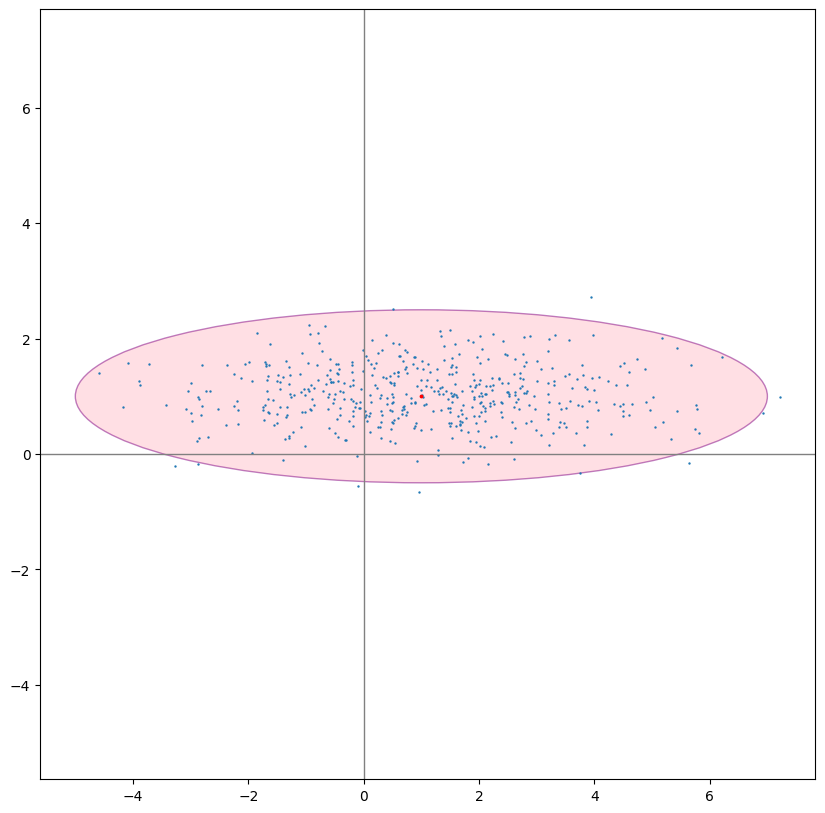

In [2]:
# estimation

import scipy.linalg as sl

fig, ax_kwargs = plt.subplots(figsize=(10, 10), dpi=100)
scale = 1, 1

ax_kwargs.axvline(c='grey', lw=1)
ax_kwargs.axhline(c='grey', lw=1)

mu = np.array([1,1])

# Prior information

S_0 = np.diag([2**2,0.5**2])

x, y = get_correlated_dataset(500, sl.sqrtm(S_0), mu, scale)
confidence_ellipse(mu, S_0, ax_kwargs,
                   alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

ax_kwargs.scatter(x, y, s=0.5)
ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)

fig.subplots_adjust(hspace=0.25)
plt.axis('equal')
plt.show()

[[ 1.04615385 -0.10658774]
 [-0.10658774  0.24615385]]


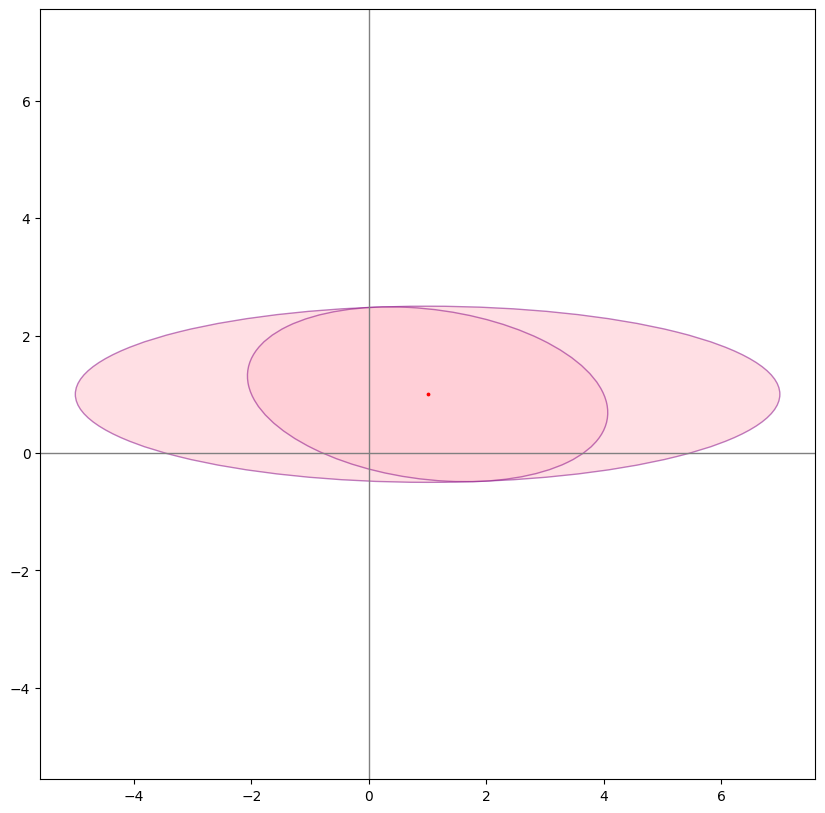

In [3]:
# estimation: case 1

import scipy.linalg as sl

fig, ax_kwargs = plt.subplots(figsize=(10, 10), dpi=100)
scale = 1, 1

ax_kwargs.axvline(c='grey', lw=1)
ax_kwargs.axhline(c='grey', lw=1)

mu = np.array([1,1])

# Prior information

S_0 = np.diag([2**2,0.5**2])

confidence_ellipse(mu, S_0, ax_kwargs,
                   alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)


# adding measurements from 30deg

angle = 30*np.pi/180

A = np.array([[np.cos(angle), np.sin(angle)]])
S_v = np.eye(A.shape[0])
S_1 = S_0 - S_0@A.T@np.linalg.inv(A@S_0@A.T+S_v)@A@S_0

print(S_1)

confidence_ellipse(mu, S_1, ax_kwargs,
                   alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

fig.subplots_adjust(hspace=0.25)
plt.axis('equal')
plt.show()

[[ 3.42853763 -0.0737071 ]
 [-0.0737071   0.12729713]]


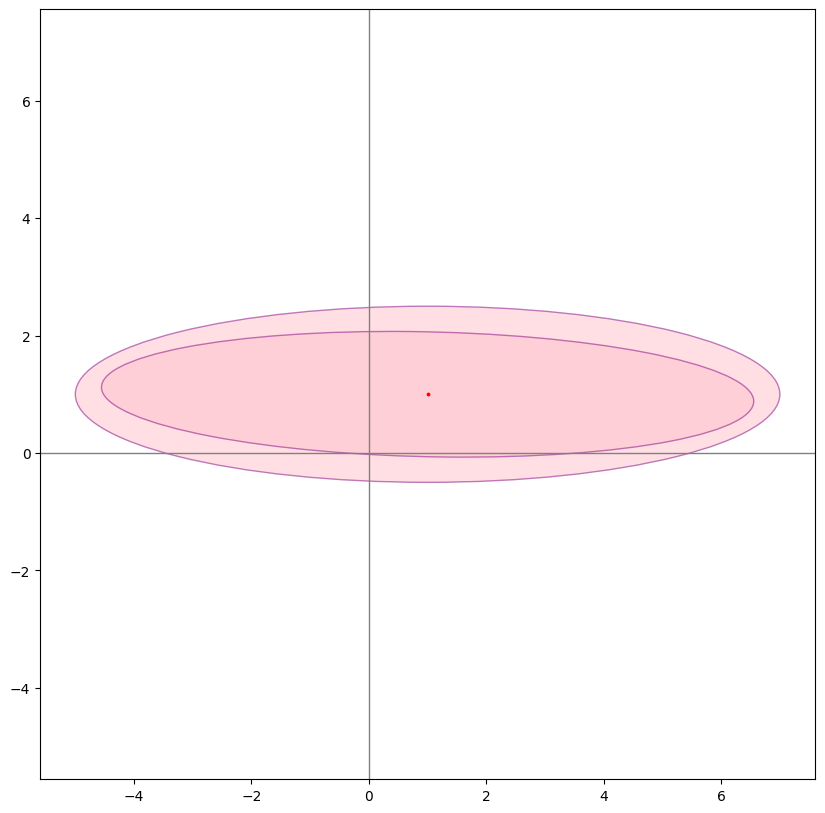

In [4]:
# estimation: case 2

import scipy.linalg as sl

fig, ax_kwargs = plt.subplots(figsize=(10, 10), dpi=100)
scale = 1, 1

ax_kwargs.axvline(c='grey', lw=1)
ax_kwargs.axhline(c='grey', lw=1)

mu = np.array([1,1])

# Prior information

S_0 = np.diag([2**2,0.5**2])

confidence_ellipse(mu, S_0, ax_kwargs,
                   alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)


# adding measurements from 80deg, 85deg, 90deg, 95deg

angle = np.array([80, 85, 90, 95])*np.pi/180

A = np.array([[np.cos(angle[0]), np.sin(angle[0])],
              [np.cos(angle[1]), np.sin(angle[1])],
              [np.cos(angle[2]), np.sin(angle[2])],
              [np.cos(angle[3]), np.sin(angle[3])]])
S_v = np.eye(A.shape[0])
S_2 = S_0 - S_0@A.T@np.linalg.inv(A@S_0@A.T+S_v)@A@S_0

print(S_2)

confidence_ellipse(mu, S_2, ax_kwargs,
                   alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

fig.subplots_adjust(hspace=0.25)
plt.axis('equal')
plt.show()
